<h1 align=center>Assignment  47: EDA 1</h1>

---------

# Question 1 : What are the key features of the wine quality data set? Discuss the importance of each feature in predicting the quality of wine.

## Answer :

### The wine quality data set contains information on the physicochemical properties of various red and white wines, as well as their quality ratings as assessed by human tasters. Some of the key features of the data set include:

- volatile acidity :   Volatile acidity is the gaseous acids present in wine.
- fixed acidity :   Primary fixed acids found in wine are tartaric, succinic, citric, and malic
- residual sugar :   Amount of sugar left after fermentation.
- citric acid :    It is weak organic acid, found in citrus fruits naturally.
- chlorides :   Amount of salt present in wine.
- free sulfur dioxide :   So2 is used for prevention of wine by oxidation and microbial spoilage.
- total sulfur dioxide 
- pH :   In wine pH is used for checking acidity
- density 
- sulphates :    Added sulfites preserve freshness and protect wine from oxidation, and bacteria.
- alcohol :   Percent of alcohol present in wine.

Each of these features plays an important role in predicting the quality of wine. For example, a higher acidity level can contribute to a crisper, more refreshing taste, while a higher alcohol content can result in a richer, fuller-bodied wine. By analyzing these various features, winemakers and tasters can gain insight into the characteristics of different wines and make informed decisions about their quality and composition.

In [16]:
import pandas as pd
import numpy as np 

#Load The Dataset 
wine_df = pd.read_csv('https://raw.githubusercontent.com/neerajprasad209/Dataset/main/wine%2Bquality/winequality-red.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [17]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [18]:
# seperating X and Y 
X = wine_df.drop(labels=['quality'],axis=1)
Y = wine_df[['quality']]

In [19]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [20]:
Y.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [21]:
## Find Feature Importance with Mutual Info

from sklearn.feature_selection import mutual_info_classif
mif_score = mutual_info_classif(X,Y.values.flatten(),random_state=21)
mif_score = pd.Series(mif_score,name='MI_score',index=X.columns)
mif_score = mif_score.sort_values(ascending=False)

<AxesSubplot: >

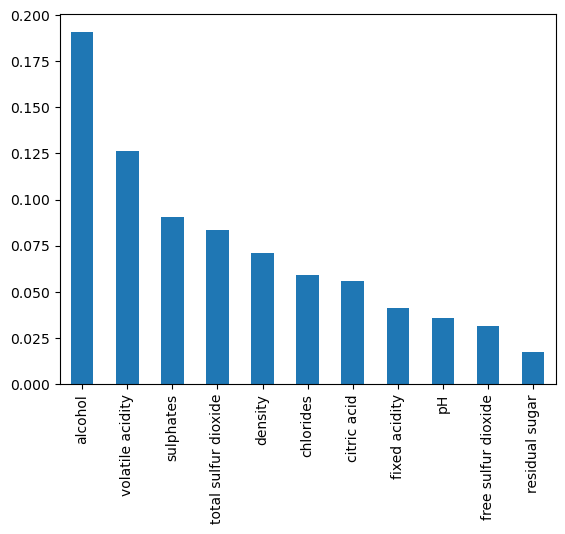

In [22]:
mif_score.plot(kind='bar')

### Observations : Alcohol, Volatile Acidity and Sulphates are top 3 features in the dataset

# Question 2 : How did you handle missing data in the wine quality data set during the feature engineering process? Discuss the advantages and disadvantages of different imputation techniques.

## Answer :

In [23]:
# Read the Dataset 
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [24]:
# Checking the Info
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [25]:
# Checking the Null values present in the Dataset
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Observation : Wine Quality does not have missing values in the dataset

In [26]:
# Checking the Percentage of the missing values present in the dataset

wine_df.isnull().mean() * 100

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

### In this dataset if missing values was present then 
- If it was below the 5% then we simply remove the null value.  
- And if null value is above 5% then we simply use simpleimputer with mean or median.

### Missing data is a common problem in real-world datasets, and handling missing data is an important step in the data preprocessing and feature engineering process. Here are some common techniques for handling missing data:

1. `Mean/median imputation`: In this technique, missing values are replaced with the mean or median value of the corresponding feature. This technique is simple and easy to implement, and can work well if the missing values are not too numerous. However, it can also introduce bias if the missing values are not missing at random, and it can reduce the variance of the data.

2. `Mode imputation`: In this technique, missing values are replaced with the mode value of the corresponding feature. This technique works well for categorical variables and can be useful if the most common value is a good approximation of the missing value. However, it can also introduce bias if the missing values are not missing at random.

3. `K-nearest neighbor imputation`: In this technique, missing values are replaced with the values of the nearest k-neighbors in the dataset. This method can work well if the missing data is not too extensive and the dataset has a clear underlying structure. However, it can also introduce bias if the nearest neighbors are not truly similar.

4. `Iterative imputation`: In this technique, missing values are imputed by modeling the missing values as a function of other variables in the dataset. Multiple iterations are performed to refine the imputed values, with each iteration using the imputed values from the previous iteration as input. This technique can be effective if the missing data is not too extensive and can be modeled using other variables in the dataset. It can also provide a measure of uncertainty for the imputed values. However, it can be computationally expensive and requires a good understanding of the underlying data structure.

### In general, the choice of imputation technique depends on the nature and extent of the missing data, as well as the characteristics of the dataset. It is important to carefully consider the advantages and disadvantages of each technique before choosing an approach.

# Question 3 : What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?

In [45]:
import pandas as pd 

df = pd.read_csv('https://raw.githubusercontent.com/neerajprasad209/Dataset/main/StudentsPerformance.csv')


In [46]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [42]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


### My approach to analyzing factors that affect students' performance in exams as follows:

1. `Gender`: Previous research has shown that gender can impact students' academic performance. You could analyze the relationship between gender and exam performance using a t-test or ANOVA to compare the mean exam scores of male and female students.

2. `Race/ethnicity`: Similar to gender, race/ethnicity can also impact students' academic performance. You could analyze the relationship between race/ethnicity and exam performance using a similar approach as for gender.

3. `Parental level of education`: Students whose parents have a higher level of education may have better study habits and support systems that contribute to their academic success. You could analyze the relationship between parental level of education and exam performance using a correlation analysis or multiple regression.

4. `Lunch`: Students who receive free or reduced-price lunches may face additional challenges that impact their academic performance. You could analyze the relationship between lunch status and exam performance using a t-test or ANOVA to compare the mean exam scores of students who receive free or reduced-price lunches versus those who do not.

5. `Test preparation course`: Students who take test preparation courses may perform better on exams due to improved study strategies and test-taking skills. You could analyze the relationship between test preparation course enrollment and exam performance using a t-test or ANOVA to compare the mean exam scores of students who took the course versus those who did not.

6. `Math, reading, and writing scores`: These three variables represent the individual subject scores of students on their exams. You could analyze the relationship between these variables and exam performance using correlation analyses or multiple regression.

7. `Total score`: This variable represents the combined score of all three subjects on the exam. You could analyze the relationship between total score and the other variables using a multiple regression.

### Overall, there are a variety of statistical techniques that could be used to analyze the factors that impact students' performance on exams, including t-tests, ANOVAs, correlation analyses, and multiple regression. The choice of technique(s) would depend on the research questions and the specific variables of interest.

In [47]:
import numpy as np 
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# printing top 5 rows of Student Performance dataset
print('Top 5 rows of Student Performance Dataset')
print(df.head())
print('\n==========================================================================\n')

# Define Categorical Column with target
cat_cols = list(df.select_dtypes(include='object').columns)
new_cols = cat_cols +['total_score']

# defin the model Formula
model_formula = "total_score ~ C(gender) + C(race_ethnicity) + C(parental_level_of_education) + C(lunch)  + C(test_preparation_course)"

# Fit the model using OLS Regression 
model = ols(model_formula,df[new_cols]).fit()

print("ANOVA Table:")
print(anova_lm(model,typ=2))

Top 5 rows of Student Performance Dataset
   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  




KeyError: "['total_score'] not in index"